In [1]:
%load_ext autoreload

In [90]:
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import nsta.core as nc
from scipy.stats import entropy
import nsta.helpers as nh 
plt.rcParams.update({'font.size': 15})

Let's look at the simplest case possible. We'll estimate the stability of a linear, autonomous RNN: $\mathbf{x}_{t+1} = \mathbf{W}\mathbf{x}_{t}$. Here $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{W} \in \mathbb{R}^{n \times n}$.

In this case the stability of the RNN is purely determined by the eigenvalues of $\mathbf{W}$ (see pg 21 of Boyd lecture notes for a refresher: https://stanford.edu/class/ee363/lectures/lq-lyap.pdf). 

Specifically, the RNN will be stable when the eigenvalues of $\mathbf{W}$ are inside the unit circle of the complex plane.

Run the simulations and visualize them.

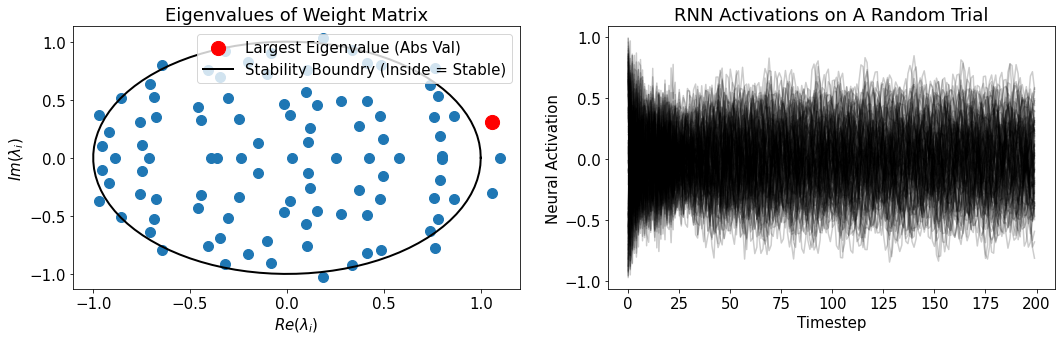

In [87]:
#run linear RNN
states,jacs,W = nh.run_random_vRNN_sim(n = 100,g = 1.1,T =200,p = 300,nl = True)
#visualize
max_eig = nh.plot_linear_RNN_summary(W,states)

Estimate Jacobian from data and then estimate largest Lyapunov exponent from estimated Jacobian. 

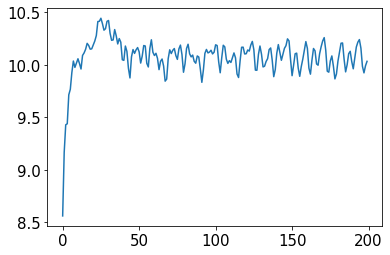

In [88]:

js, cs = nc.estimate_jacobian(states)

plt.plot(np.linalg.norm(jacs,axis = (2,3))[20,:])
estimated_LLE_from_true_jacobian = nc.estimate_LLE(jacs, p = 200)
estimated_LLE_from_estimated_jacobian = nc.estimate_LLE(js, p = 200)


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000001
1.5000000000000002
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0


0.0649549274216824

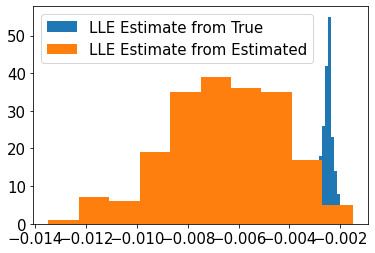

In [102]:





#plt.hist(qk,label = 'LLE Estimate from True')
#plt.hist(pk,label = 'LLE Estimate from Estimated')
#plt.legend()
for g in np.arange(.1,2.1,.1):    
    print(g)
    states,jacs,W = nh.run_random_vRNN_sim(n = 32,g = g,T =100,p = 200,nl = True)
    js, cs = nc.estimate_jacobian(states)

    estimated_LLE_from_true_jacobian = nc.estimate_LLE(jacs, p = 200)
    estimated_LLE_from_estimated_jacobian = nc.estimate_LLE(js, p = 200)

    pk = estimated_LLE_from_estimated_jacobian.flatten()
    qk = estimated_LLE_from_true_jacobian.mean(0)

    


entropy(qk,pk)

In [7]:
e,cond = nh.get_max_abs_eig_value(W)
print(e)
#visualize the estimated stability
fig, ax = plt.subplots(1,1,figsize = (15,5))
#ax.hist(np.exp(estimated_lams_with_eigenvectors),bins = 200,alpha = 0.7,label = 'Estimates of Largest Lyapunov Exponent with EV');
ax.hist(np.exp(estimate_from_known.flatten()),bins = 200,alpha = 0.7, label = 'Estimates of Largest Lyapunov Exponent without EV');
#ax.hist(np.exp(estimated_lams_true_eigmetric), bins = 200,label = 'Estimates of LLE using Eigenvector Metric')
#ax.hist(np.exp(estimated_lams_true_identity_metric), bins = 200,alpha = 0.5,label = 'Estimates of LLE using Identity Metric')
ax.vlines(max_eig,0,50,'k',label = 'Largest Eigenvalue')
ax.legend()
ax.set_title('Estimated Stability')
ax.set_ylabel('Count')
ax.set_xlabel(r'$\lambda_{max}$')

2.004990445419843


KeyboardInterrupt: 

In [91]:
all_eigs = []
for i in range(js.shape[0]):
    eigs,_ = np.linalg.eig(js[i])
    all_eigs.append(np.max(np.abs(eigs)))
    
#plt.plot(all_eigs)
#plt.plot(np.linalg.norm((js),ord = 'fro', axis = (1,2)))

    #plt.plot(np.linalg.norm((W-js),ord = 'fro', axis = (1,2)))
#np.linalg.norm(,'fro',axis = 2)
#plt.plot(np.linalg.norm(cs,axis = 0))

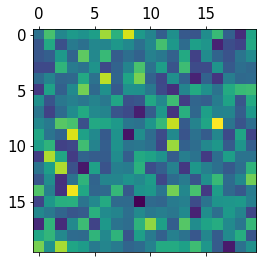

In [92]:
plt.matshow(js[40])

Compare the largest eigenvalue of $\mathbf{W}$ to the estimated largest Lyapunov exponent. It's an exercise for the reader that the estimated largest Lyapunov exponents need to be exponentiated to compare them to the largest eigenvalue of $\mathbf{W}$.

Question for Leo: why do the estimates seem biased to be lower than the largest Lyapunov exponent? 

Text(0.5, 0, '$\\lambda_{max}$')

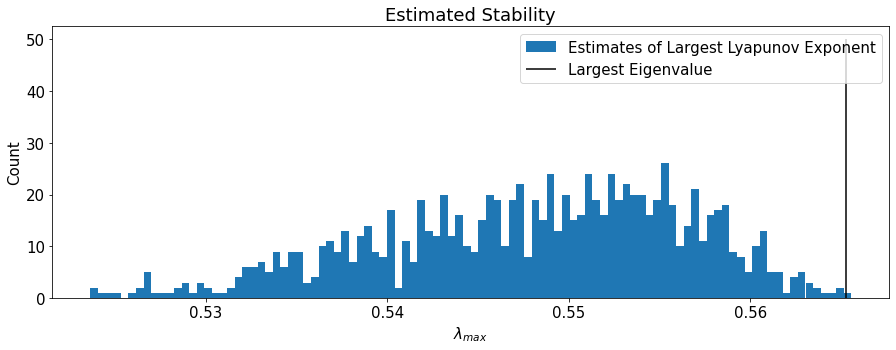

In [121]:
fig, ax = plt.subplots(1,1,figsize = (15,5))
ax.hist(np.exp(estimated_lams),bins = 100,label = 'Estimates of Largest Lyapunov Exponent');
ax.vlines(max_eig,0,50,'k',label = 'Largest Eigenvalue')
ax.legend()
ax.set_title('Estimated Stability')
ax.set_ylabel('Count')
ax.set_xlabel(r'$\lambda_{max}$')

In [113]:

#np.outer(random_scalings,leading_eig_vec)
#leading_eig_vec
#random_scalings_of_lead_eig = np.random.randn(p)

array([[-0.15712812,  0.12703116,  0.07150249, ...,  0.00927992,
         0.06788507,  0.15986709],
       [ 0.216902  , -0.17535571, -0.0987031 , ..., -0.01281014,
        -0.09370956, -0.22068291],
       [ 0.02088406, -0.01688384, -0.00950347, ..., -0.0012334 ,
        -0.00902267, -0.0212481 ],
       ...,
       [-0.1567979 ,  0.1267642 ,  0.07135222, ...,  0.00926042,
         0.0677424 ,  0.15953112],
       [-0.17120652,  0.13841293,  0.07790898, ...,  0.01011138,
         0.07396745,  0.17419089],
       [-0.07606214,  0.06149288,  0.03461272, ...,  0.0044922 ,
         0.03286161,  0.07738801]])

In [114]:
leading_eig_vec.shape

(20,)

In [115]:
random_scalings.shape

(1000,)

array([[-0.15712812,  0.216902  ,  0.02088406, ..., -0.1567979 ,
        -0.17120652, -0.07606214],
       [ 0.12703116, -0.17535571, -0.01688384, ...,  0.1267642 ,
         0.13841293,  0.06149288],
       [ 0.07150249, -0.0987031 , -0.00950347, ...,  0.07135222,
         0.07790898,  0.03461272],
       ...,
       [ 0.00927992, -0.01281014, -0.0012334 , ...,  0.00926042,
         0.01011138,  0.0044922 ],
       [ 0.06788507, -0.09370956, -0.00902267, ...,  0.0677424 ,
         0.07396745,  0.03286161],
       [ 0.15986709, -0.22068291, -0.0212481 , ...,  0.15953112,
         0.17419089,  0.07738801]])